# Training 

Now we have the training, validation, and testing data. The next step is to use the model.fit() function to train the model.

Set the batch_size to 1024, and the number of epochs to 100 for the starter. You can change this number according to the learning curve graph. If both the loss curves converge at a certain value, it means that for every training epoch after, it gives a marginal improvement. Divergence of the validation and training sample losses implies overfitting on your training data set.

In [ ]:
batch_size = 1024
epochs = 100

In [ ]:
history = model.fit(X_train ,y_train,
          batch_size=batch_size,
          epochs=epochs, 
          validation_data=(X_val, y_val),
          shuffle=True)

# Evaluation

Now to validate the result, plot the learning curve: loss on the training set versus the loss on the validation set. Then plot the ROC curve for the model.

In [ ]:
import matplotlib.pyplot as plt
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

In [ ]:
learningCurve(history)

In [ ]:
label = ['j_g','j_q','j_w','j_z','j_t']
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'ParticleNet Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

In [ ]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='ParticleNet')

Here is our result for Particle net lite version.

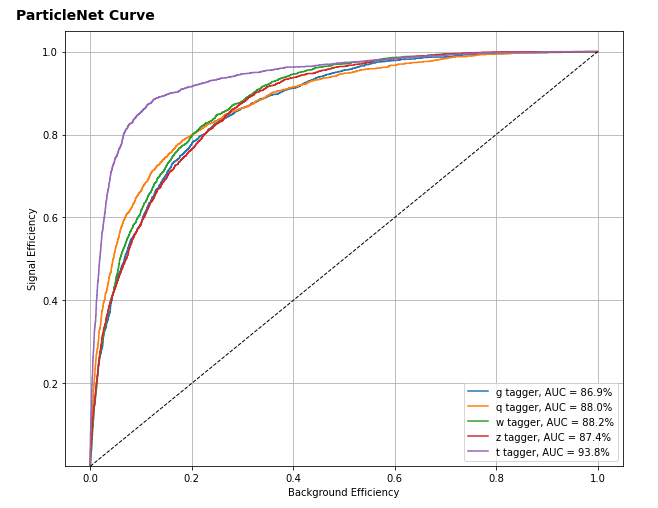

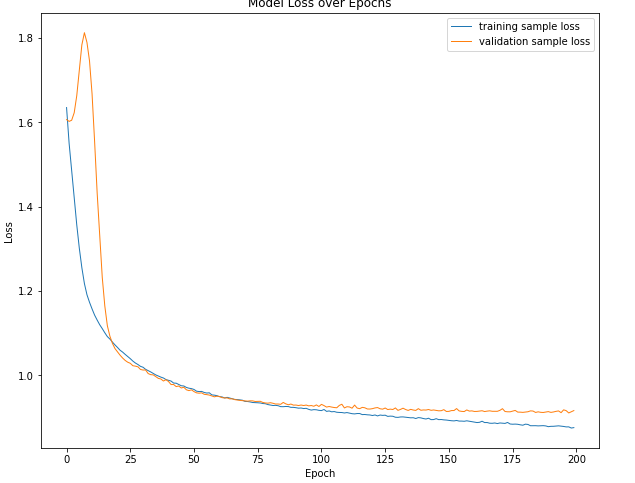

# Exercise

Since the particle net model is relatively large, we faced lots of memory problems when first loading the data and model. You will likely encounter the same kind of difficulties during this step. Now it is your job to make sure that the out of memory issue does not ruin the whole training process. Here are some solutions: reduce the number of jets of each tagger(category), reduce batch size, decrease the number of constituents, etc. Before making any changes to the model, think about why you modify these numbers and what are the consequences, and how will these changes affact the result. 

Now it is your time to first run the particle net lite version and find out the best outcome. Then you can try the full version of particle net.

If you are still interested in developing the particle net. You can try to use the particle net to train the top tagger data from the original paper.